##**Capstone Webscrapping with BeautifulSoup**
  - Pada kesempatan kali ini, dilakukan proses webscrapping sederhana dari situs https://www.exchange-rates.org/history/IDR/USD/T untuk kemudian diolah dan dianalisis menjadi suatu visualisasi data.
  
  - Tujuan dilakukannya untuk menyelesaikan tugas Capstone - Data Analytics Specialization by Algoritma Academy.

**Requesting the Data and Creating the BeautifulSoup**

In [1]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data#panel')

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<script src="/cdn-cgi/apps/head/gYtXOyllgyP3-Z2iKTP8rRWGBm4.js"></script><script async defer src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992"></script>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" '

Dapat kita lihat diatas bahwa, link url dari halaman yang kita butuhkan telah discrapping menggunakan package **requests**.

Namun, hasil scrapping tersebut masih berupa link code html yang tidak enak dilihat oleh mata manusia. Selanjutnya, kita akan menginstal BeautifulSoup untuk membantu merapihkan data code html tersebut.

In [3]:
#menginstal BeautifulSoup
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


**Finding the right key to scrap the data & Extracting the right information**

In [4]:
table = soup.find('table', attrs={'class':'table table-striped text-sm text-lg-normal'})
print(table.prettify()[1:500])

table class="table table-striped text-sm text-lg-normal">
 <thead>
  <tr>
   <th class="text-center">
    Date
   </th>
   <th class="text-center">
    Market Cap
   </th>
   <th class="text-center">
    Volume
   </th>
   <th class="text-center">
    Open
   </th>
   <th class="text-center">
    Close
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2022-10-02
   </th>
   <td class="text-center">
    $158,410,068,981
   </td>
   <td class="te


finding row length

In [5]:
date = table.find_all('th', attrs={'class':'font-semibold text-center'})
date

[<th class="font-semibold text-center" scope="row">2022-10-02</th>,
 <th class="font-semibold text-center" scope="row">2022-10-01</th>,
 <th class="font-semibold text-center" scope="row">2022-09-30</th>,
 <th class="font-semibold text-center" scope="row">2022-09-29</th>,
 <th class="font-semibold text-center" scope="row">2022-09-28</th>,
 <th class="font-semibold text-center" scope="row">2022-09-27</th>,
 <th class="font-semibold text-center" scope="row">2022-09-26</th>,
 <th class="font-semibold text-center" scope="row">2022-09-25</th>,
 <th class="font-semibold text-center" scope="row">2022-09-24</th>,
 <th class="font-semibold text-center" scope="row">2022-09-23</th>,
 <th class="font-semibold text-center" scope="row">2022-09-22</th>,
 <th class="font-semibold text-center" scope="row">2022-09-21</th>,
 <th class="font-semibold text-center" scope="row">2022-09-20</th>,
 <th class="font-semibold text-center" scope="row">2022-09-19</th>,
 <th class="font-semibold text-center" scope="ro

In [10]:
date[0].text

'2022-10-02'

In [11]:
row_length = len(date)
row_length

31

In [8]:
market_cap = table.find_all('td', attrs={'class':'text-center'})
market_cap

[<td class="text-center">
 $158,410,068,981
 </td>, <td class="text-center">
 $5,052,407,841
 </td>, <td class="text-center">
 $1,311.26
 </td>, <td class="text-center">
 N/A
 </td>, <td class="text-center">
 $160,462,955,554
 </td>, <td class="text-center">
 $11,849,125,784
 </td>, <td class="text-center">
 $1,329.15
 </td>, <td class="text-center">
 $1,311.26
 </td>, <td class="text-center">
 $161,267,455,734
 </td>, <td class="text-center">
 $11,834,328,252
 </td>, <td class="text-center">
 $1,335.74
 </td>, <td class="text-center">
 $1,329.15
 </td>, <td class="text-center">
 $161,716,193,676
 </td>, <td class="text-center">
 $16,571,161,476
 </td>, <td class="text-center">
 $1,340.02
 </td>, <td class="text-center">
 $1,335.74
 </td>, <td class="text-center">
 $160,800,122,125
 </td>, <td class="text-center">
 $16,685,874,856
 </td>, <td class="text-center">
 $1,331.15
 </td>, <td class="text-center">
 $1,340.02
 </td>, <td class="text-center">
 $160,767,471,778
 </td>, <td class=

the scrapping process here

In [42]:
temp = [] #initiating a tuple

for i in range(0, row_length):

    #scrapping process
    #get period
    date = table.find_all('th', attrs={'class':'font-semibold text-center'})[i].text
    volume = table.find_all('td', attrs={'class':'text-center'})[1].text.strip('\n')

    temp.append((date, volume))
    
temp 

[('2022-10-02', '$5,052,407,841'),
 ('2022-10-01', '$5,052,407,841'),
 ('2022-09-30', '$5,052,407,841'),
 ('2022-09-29', '$5,052,407,841'),
 ('2022-09-28', '$5,052,407,841'),
 ('2022-09-27', '$5,052,407,841'),
 ('2022-09-26', '$5,052,407,841'),
 ('2022-09-25', '$5,052,407,841'),
 ('2022-09-24', '$5,052,407,841'),
 ('2022-09-23', '$5,052,407,841'),
 ('2022-09-22', '$5,052,407,841'),
 ('2022-09-21', '$5,052,407,841'),
 ('2022-09-20', '$5,052,407,841'),
 ('2022-09-19', '$5,052,407,841'),
 ('2022-09-18', '$5,052,407,841'),
 ('2022-09-17', '$5,052,407,841'),
 ('2022-09-16', '$5,052,407,841'),
 ('2022-09-15', '$5,052,407,841'),
 ('2022-09-14', '$5,052,407,841'),
 ('2022-09-13', '$5,052,407,841'),
 ('2022-09-12', '$5,052,407,841'),
 ('2022-09-11', '$5,052,407,841'),
 ('2022-09-10', '$5,052,407,841'),
 ('2022-09-09', '$5,052,407,841'),
 ('2022-09-08', '$5,052,407,841'),
 ('2022-09-07', '$5,052,407,841'),
 ('2022-09-06', '$5,052,407,841'),
 ('2022-09-05', '$5,052,407,841'),
 ('2022-09-04', '$5,

**Creating data frame & Data wrangling**

In [43]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('date', 'volume (USD)'))
df.head()

,date,volume (USD)
0,2022-10-02,"$5,052,407,841"
1,2022-10-01,"$5,052,407,841"
2,2022-09-30,"$5,052,407,841"
3,2022-09-29,"$5,052,407,841"
4,2022-09-28,"$5,052,407,841"


In [44]:
df.dtypes

date            object
volume (USD)    object
dtype: object

the data cleaning here

In [49]:
df['volume (USD)'] = df['volume (USD)'].str.replace('[$|,]', '', regex=True)

In [50]:
df

,date,volume (USD)
0,2022-10-02,5052407841
1,2022-10-01,5052407841
2,2022-09-30,5052407841
3,2022-09-29,5052407841
4,2022-09-28,5052407841
5,2022-09-27,5052407841
6,2022-09-26,5052407841
7,2022-09-25,5052407841
8,2022-09-24,5052407841
9,2022-09-23,5052407841


In [51]:
df['volume (USD)'] = df['volume (USD)'].astype('float64')

In [52]:
df.dtypes

date             object
volume (USD)    float64
dtype: object

In [53]:
df = df.set_index('date')

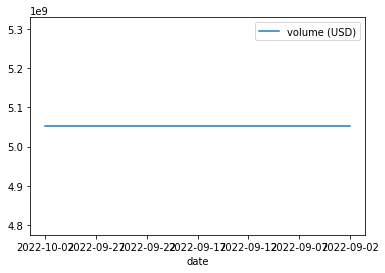

In [54]:
df.plot()